# GPI Datathon 2025
This notebook is meant to provide some common, Pythonic methods for approaching the GPI data. It may or may not be applicable to other languages or methods, but hopefully can provide a common basis for workflows, and point to common aspects of the data that need cleaning/transformation to be useful for visualization.

**I would suggest skipping Section 2, unless you know you want to work with raw data**

## 1. Setup Code

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import re
import folium
import matplotlib.pyplot as plt
import seaborn
#import ipywidgets as widgets

In [2]:
# By default pandas will cut off the number of rows and columns it will show. This overrides that.
pd.options.display.max_rows = 500000
pd.options.display.max_columns = 600

## 2. Importing Raw Data
Everything in this section is meant to take raw STAR exports, concatenate them (as sales, inventory, etc. data), and then stitch headers onto them. Datathon participants should not need to use these. Therefore, you might skip to the next section.

### Load CSVs

In [ ]:
goupil = '2020_02_18_GoupilDatathon.csv'
inv_french = '2024_04_29_DatathonFRENCHINV.csv'
inv_dutch = '2024_05_08_DatathonDUTCHINV.csv'
inv_german = '2024_05_08_DatathonGERMANINV.csv'
inv_spanish = '2024_05_09_DatathonSPANINV.csv'
info_french = '2024_05_27_DatathonFRENCHINFO.csv'
info_german = '2024_05_27_DatathonGERMANINFO.csv'
info_dutch = '2024_05_31_DatathonDUTCHINFO.csv'
info_spanish = '2024_05_31_DatathonSPANINFO.csv'
info_inven = '2024_06_05_DatathonINVENINFO.csv'
inventories = '2024_07_11_DatathonINVENTORIES.csv'
collectors = '2025_02_06_DatathonCOLLECTORS.csv'
prices = '2025_02_06_DatathonPRICES.csv'
xwebcolls = '2025_02_10_DatathonXWEBCOLLS.csv'
xwebprof = '2025_02_10_DatathonXWEBPROF.csv'
sales_belgian = '2025_02_18_DatathonBELGSALES.csv'
sales_british1 = '2025_02_18_DatathonBRITISHSALES-1.csv'
sales_british2 = '2025_02_18_DatathonBRITISHSALES-2.csv'
sales_british3 = '2025_02_18_DatathonBRITISHSALES-3.csv'
sales_british4 = '2025_02_18_DatathonBRITISHSALES-4.csv'
sales_british5 = '2025_02_18_DatathonBRITISHSALES-5.csv'
sales_dutch = '2025_02_18_DatathonDUTCHSALES.csv'
sales_french1 = '2025_02_18_DatathonFRENCHSALES-1.csv'
sales_french3 = '2025_02_18_DatathonFRENCHSALES-3.csv'
sales_german1 = '2025_02_18_DatathonGERMANSALES-1.csv'
sales_german2 = '2025_02_18_DatathonGERMANSALES-2.csv'
sales_german3 = '2025_02_18_DatathonGERMANSALES-3.csv'
sales_german7 = '2025_02_18_DatathonGERMANSALES-7.csv'
sales_german8 = '2025_02_18_DatathonGERMANSALES-8.csv'
knoedler = '2025_02_18_Datathonknoedler.csv'
sales_scandinavian = '2025_02_18_DatathonSCANDISALES.csv'
collectors_xslx = '2025_02_06_DatathonCOLLECTORS.xlsx'
prices_xslx = '2025_02_06_DatathonPRICES.xlsx'
xwebcolls_headers_xslx = '2025_02_10_DatathonXWEBCOLLS-HEADERS.xlsx'
xwebcolls_xslx = '2025_02_10_DatathonXWEBCOLLS.xlsx'
xwebprof_xslx = '2025_02_10_DatathonXWEBPROF.xlsx'
sales_contents_by_nation_tracking_sheet_xslx = '2025_02_18_DatathonSales-contents-by-nation-tracking-sheet.xlsx'
sales_scandinavia_xslx = '2025_02_18_DatathonSCANDISALES.xlsx'

### Load,Combining, and Modify Sales

In [ ]:
sales_header = ['pi_record_no', 'catalog_number', 'sale_code', 'lot_number', 'pg', 'lot_sale_year', 'lot_sale_month', 'lot_sale_day', 'lot_sale_mod', 'expert_auth_1', 'expert_ulan_1', 'expert_auth_2', 'expert_ulan_2', 'expert_auth_3', 'expert_ulan_3', 'expert_auth_4', 'expert_ulan_4', 'commissaire_pr_1', 'comm_ulan_1', 'commissaire_pr_2', 'comm_ulan_2', 'commissaire_pr_3', 'comm_ulan_3', 'commissaire_pr_4', 'comm_ulan_4', 'auction_house_1', 'house_ulan_1', 'auction_house_2', 'house_ulan_2', 'auction_house_3', 'house_ulan_3', 'auction_house_4', 'house_ulan_4', 'title', 'title_translation', 'title_modifier', 'artist_name_1', 'artist_info_1', 'art_authority_1', 'nationality_1', 'attrib_mod_1', 'attrib_mod_auth_1', 'artist_ulan_1', 'artist_name_2', 'artist_info_2', 'art_authority_2', 'nationality_2', 'attrib_mod_2', 'attrib_mod_auth_2', 'artist_ulan_2', 'artist_name_3', 'artist_info_3', 'art_authority_3', 'nationality_3', 'attrib_mod_3', 'attrib_mod_auth_3', 'artist_ulan_3', 'artist_name_4', 'artist_info_4', 'art_authority_4', 'nationality_4', 'attrib_mod_4', 'attrib_mod_auth_4', 'artist_ulan_4', 'artist_name_5', 'artist_info_5', 'art_authority_5', 'nationality_5', 'attrib_mod_5', 'attrib_mod_auth_5', 'artist_ulan_5', 'hand_note_1', 'hand_note_so_1', 'hand_note_2', 'hand_note_so_2', 'hand_note_3', 'hand_note_so_3', 'hand_note_4', 'hand_note_so_4', 'hand_note_5', 'hand_note_so_5', 'hand_note_6', 'hand_note_so_6', 'hand_note_7', 'hand_note_so_7', 'object_type', 'materials', 'dimensions', 'formatted_dimens', 'format', 'genre', 'subject', 'inscription', 'sell_name_1', 'sell_name_so_1', 'sell_name_ques_1', 'sell_mod_1', 'sell_auth_name_1', 'sell_auth_nameq_1', 'sell_auth_mod_1', 'sell_auth_mod_a_1', 'sell_ulan_1', 'sell_name_2', 'sell_name_so_2', 'sell_name_ques_2', 'sell_mod_2', 'sell_auth_name_2', 'sell_auth_nameq_2', 'sell auth_mod_2', 'sell_auth_mod_a_2', 'sell_ulan_2', 'sell_name_3', 'sell_name_so_3', 'sell_name_ques_3', 'sell_mod_3', 'sell_auth_name_3', 'sell_auth_nameq_3', 'sell_auth_mod_3', 'sell_auth_mod_a_3', 'sell_ulan_3', 'sell_name_4', 'sell_name_so_4', 'sell_name_ques_4', 'sell_mod_4', 'sell_auth_name_4', 'sell_auth_nameq_4', 'sell_auth_mod_4', 'sell_auth_mod_a_4', 'sell_ulan_4', 'sell_name_5', 'sell_name_so_5', 'sell_name_ques_5', 'sell_mod_5', 'sell_auth_name_5', 'sell_auth_nameq_5', 'sell_auth_mod_5', 'sell_auth_mod_a_5', 'sell_ulan_5', 'sell_name_6', 'sell_name_so_6', 'sell_name_ques_6', 'sell_mod_6', 'sell_auth_name_6', 'sell_auth_nameq_6', 'sell_auth_mod_6', 'sell_auth_mod_a_6', 'sell_ulan_6', 'sell_name_7', 'sell_name_so_7', 'sell_name_ques_7', 'sell_mod_7', 'sell_auth_name_7', 'sell_auth_nameq_7', 'sell_auth_mod_7', 'sell_auth_mod_a_7', 'sell_ulan_7', 'transaction', 'transaction_so', 'transaction_cite', 'price_amount_1', 'price_currency_1', 'price_note_1', 'price_source_1', 'price_citation_1', 'price_amount_2', 'price_currency_2', 'price_note_2', 'price_source_2', 'price_citation_2', 'price_amount_3', 'price_currency_3', 'price_note_3', 'price_source_3', 'price_citation_3', 'est_price', 'est_price_curr', 'est_price_desc', 'est_price_so', 'start_price', 'start_price_curr', 'start_price_desc', 'start_price_so', 'ask_price', 'ask_price_curr', 'ask_price_desc', 'ask_price_so', 'buy_name_1', 'buy_name_so_1', 'buy_name_ques_1', 'buy_name_cite_1', 'buy_mod_1', 'buy_auth_name_1', 'buy_auth_nameQ_1', 'buy_auth_mod_1', 'buy_auth_mod_a_1', 'buy_ulan_1', 'buy_name_2', 'buy_name_so_2', 'buy_name_ques_2', 'buy_name_cite_2', 'buy_mod_2', 'buy_auth_name_2', 'buy_auth_nameQ_2', 'buy_auth_mod_2', 'buy_auth_mod_a_2', 'buy_ulan_2', 'buy_name_3', 'buy_name_so_3', 'buy_name_ques_3', 'buy_name_cite_3', 'buy_mod_3', 'buy_auth_name_3', 'buy_auth_nameQ_3', 'buy_auth_mod_3', 'buy_auth_mod_a_3', 'buy_ulan_3', 'buy_name_4', 'buy_name_so_4', 'buy_name_ques_4', 'buy_name_cite_4', 'buy_mod_4', 'buy_auth_name_4', 'buy_auth_nameQ_4', 'buy_auth_mod_4', 'buy_auth_mod_a_4', 'buy_ulan_4', 'prev_owner_1', 'prev_own_ques_1', 'prev_own_so_1', 'prev_own_auth_1', 'prev_own_auth_D_1', 'prev_own_auth_E_1', 'prev_own_auth_P_1', 'prev_own_auth_L_1', 'prev_own_auth_Q_1', 'prev_own_ulan_1', 'prev_owner_2', 'prev_own_ques_2', 'prev_own_so_2', 'prev_own_auth_2', 'prev_own_auth_D_2', 'prev_own_auth_E_2', 'prev_own_auth_P_2', 'prev_own_auth_L_2', 'prev_own_auth_Q_2', 'prev_own_ulan_2', 'prev_owner_3', 'prev_own_ques_3', 'prev_own_so_3', 'prev_own_auth_3', 'prev_own_auth_D_3', 'prev_own_auth_E_3', 'prev_own_auth_P_3', 'prev_own_auth_L_3', 'prev_own_auth_Q_3', 'prev_own_ulan_3', 'prev_owner_4', 'prev_own_ques_4', 'prev_own_so_4', 'prev_own_auth_4', 'prev_own_auth_D_4', 'prev_own_auth_E_4', 'prev_own_auth_P_4', 'prev_own_auth_L_4', 'prev_own_auth_Q_4', 'prev_own_ulan_4', 'prev_owner_5', 'prev_own_ques_5', 'prev_own_so_5', 'prev_own_auth_5', 'prev_own_auth_D_5', 'prev_own_auth_E_5', 'prev_own_auth_P_5', 'prev_own_auth_L_5', 'prev_own_auth_Q_5', 'prev_own_ulan_5', 'prev_owner_6', 'prev_own_ques_6', 'prev_own_so_6', 'prev_own_auth_6', 'prev_own_auth_D_6', 'prev_own_auth_E_6', 'prev_own_auth_P_6', 'prev_own_auth_L_6', 'prev_own_auth_Q_6', 'prev_own_ulan_6', 'prev_owner_7', 'prev_own_ques_7', 'prev_own_so_7', 'prev_own_auth_7', 'prev_own_auth_D_7', 'prev_own_auth_E_7', 'prev_own_auth_P_7', 'prev_own_auth_L_7', 'prev_own_auth_Q_7', 'prev_own_ulan_7', 'prev_owner_8', 'prev_own_ques_8', 'prev_own_so_8', 'prev_own_auth_8', 'prev_own_auth_D_8', 'prev_own_auth_E_8', 'prev_own_auth_P_8', 'prev_own_auth_L_8', 'prev_own_auth_Q_8', 'prev_own_ulan_8', 'prev_owner_9', 'prev_own_ques_9', 'prev_own_so_9', 'prev_own_auth_9', 'prev_own_auth_D_9', 'prev_own_auth_E_9', 'prev_own_auth_P_9', 'prev_own_auth_L_9', 'prev_own_auth_Q_9', 'prev_own_ulan_9', 'prev_sale_year_1', 'prev_sale_mo_1', 'prev_sale_day_1', 'prev_sale_loc_1', 'prev_sale_lot_1', 'prev_sale_ques_1', 'prev_sale_cat_1', 'prev_sale_year_2', 'prev_sale_mo_2', 'prev_sale_day_2', 'prev_sale_loc_2', 'prev_sale_lot_2', 'prev_sale_ques_2', 'prev_sale_cat_2', 'prev_sale_year_3', 'prev_sale_mo_3', 'prev_sale_day_3', 'prev_sale_loc_3', 'prev_sale_lot_3', 'prev_sale_ques_3', 'prev_sale_cat_3', 'prev_sale_year_4', 'prev_sale_mo_4', 'prev_sale_day_4', 'prev_sale_loc_4', 'prev_sale_lot_4', 'prev_sale_ques_4', 'prev_sale_cat_4', 'prev_sale_year_5', 'prev_sale_mo_5', 'prev_sale_day_5', 'prev_sale_loc_5', 'prev_sale_lot_5', 'prev_sale_ques_5', 'prev_sale_cat_5', 'prev_sale_year_6', 'prev_sale_mo_6', 'prev_sale_day_6', 'prev_sale_loc_6', 'prev_sale_lot_6', 'prev_sale_ques_6', 'prev_sale_cat_6', 'prev_sale_year_7', 'prev_sale_mo_7', 'prev_sale_day_7', 'prev_sale_loc_7', 'prev_sale_lot_7', 'prev_sale_ques_7', 'prev_sale_cat_7', 'post_sale_year_1', 'post_sale_mo_1', 'post_sale_day_1', 'post_sale_loc_1', 'post_sale_lot_1', 'post_sale_q_1', 'post_sale_cat_1', 'post_sale_year_2', 'post_sale_mo_2', 'post_sale_day_2', 'post_sale_loc_2', 'post_sale_lot_2', 'post_sale_q_2', 'post_sale_cat_2', 'post_sale_year_3', 'post_sale_mo_3', 'post_sale_day_3', 'post_sale_loc_3', 'post_sale_lot_3', 'post_sale_q_3', 'post_sale_cat_3', 'post_sale_year_4', 'post_sale_mo_4', 'post_sale_day_4', 'post_sale_loc_4', 'post_sale_lot_4', 'post_sale_q_4', 'post_sale_cat_4', 'post_sale_year_5', 'post_sale_mo_5', 'post_sale_day_5', 'post_sale_loc_5', 'post_sale_lot_5', 'post_sale_q_5', 'post_sale_cat_5', 'post_sale_year_6', 'post_sale_mo_6', 'post_sale_day_6', 'post_sale_loc_6', 'post_sale_lot_6', 'post_sale_q_6', 'post_sale_cat_6', 'post_sale_year_7', 'post_sale_mo_7', 'post_sale_day_7', 'post_sale_loc_7', 'post_sale_lot_7', 'post_sale_q_7', 'post_sale_cat_7', 'post_sale_year_8', 'post_sale_mo_8', 'post_sale_day_8', 'post_sale_loc_8', 'post_sale_lot_8', 'post_sale_q_8', 'post_sale_cat_8', 'post_sale_year_9', 'post_sale_mo_9', 'post_sale_day_9', 'post_sale_loc_9', 'post_sale_lot_9', 'post_sale_q_9', 'post_sale_cat_9', 'post_own_1', 'post_own_q_1', 'post_own_so_1', 'post_own_auth_1', 'post_own_auth_D_1', 'post_own_auth_E_1', 'post_own_auth_P_1', 'post_own_auth_L_1', 'post_own_auth_Q_1', 'post_own_ulan_1', 'post_own_2', 'post_own_q_2', 'post_own_so_2', 'post_own_auth_2', 'post_own_auth_D_2', 'post_own_auth_E_2', 'post_own_auth_P_2', 'post_own_auth_L_2', 'post_own_auth_Q_2', 'post_own_ulan_2', 'post_own_3', 'post_own_q_3', 'post_own_so_3', 'post_own_auth_3', 'post_own_auth_D_3', 'post_own_auth_E_3', 'post_own_auth_P_3', 'post_own_auth_L_3', 'post_own_auth_Q_3', 'post_own_ulan_3', 'post_own_4', 'post_own_q_4', 'post_own_so_4', 'post_own_auth_4', 'post_own_auth_D_4', 'post_own_auth_E_4', 'post_own_auth_P_4', 'post_own_auth_L_4', 'post_own_auth_Q_4', 'post_own_ulan_4', 'post_own_5', 'post_own_q_5', 'post_own_so_5', 'post_own_auth_5', 'post_own_auth_D_5', 'post_own_auth_E_5', 'post_own_auth_P_5', 'post_own_auth_L_5', 'post_own_auth_Q_5', 'post_own_ulan_5', 'post_own_6', 'post_own_q_6', 'post_own_so_6', 'post_own_auth_6', 'post_own_auth_D_6', 'post_own_auth_E_6', 'post_own_auth_P_6', 'post_own_auth_L_6', 'post_own_auth_Q_6', 'post_own_ulan_6', 'pres_loc_geog_1', 'pres_loc_inst_1', 'pres_loc_insq_1', 'pres_loc_insi_1', 'pres_loc_acc_1', 'pres_loc_accq_1', 'pres_loc_note_1', 'pres_loc_geog_2', 'pres_loc_inst_2', 'pres_loc_insq_2', 'pres_loc_insi_2', 'pres_loc_acc_2', 'pres_loc_accq_2', 'pres_loc_note_2', 'ppg', 'lot_notes', 'persistent_puid', 'file_segment', 'flag']

In [ ]:
column_filter = ['pi_record_no', 
                 'catalog_number', 
                 'lot_number', 
                 'lot_sale_year', 
                 'lot_sale_month', 
                 'lot_sale_day', 
                 'expert_auth_1', 
                 'commissaire_pr_1', 
                 'auction_house_1', 
                 'title', 
                 'art_authority_1', 
                 'nationality_1', 
                 'attrib_mod_auth_1', 
                 'object_type', 
                 'sell_auth_name_1', 
                 'sell_auth_nameq_1', 
                 'sell_auth_mod_1', 
                 'sell_auth_mod_a_1', 
                 'sell_ulan_1', 
                 'transaction', 
                 'price_amount_1', 
                 'price_currency_1', 
                 'buy_auth_name_1', 
                 'pres_loc_geog_1', 
                 'pres_loc_inst_1']

#### Combine Scandinavian Sales

In [ ]:
sales_scandinavian = pd.read_csv('~/Desktop/data/'+sales_scandinavian, names=sales_header, low_memory=False)

In [ ]:
scandinavian_sales_filtered = sales_scandinavian[column_filter]

In [ ]:
scandinavian_sales_filtered.shape

#### Combine Dutch Sales
No combine required, but does require processing.

In [ ]:
sales_dutch = pd.read_csv('~/Desktop/data/'+sales_dutch, names=sales_header, low_memory=False)

In [ ]:
dutch_sales_filtered = sales_dutch[column_filter]

In [ ]:
dutch_sales_filtered.head(2)

#### Combine Belgian Sales
No combine required, but does require processing.

In [ ]:
sales_belgian = pd.read_csv('~/Desktop/data/'+sales_belgian, names=sales_header, low_memory=False)

In [ ]:
belgian_sales_filtered = sales_belgian[column_filter]

In [ ]:
belgian_sales_filtered.head(2)

#### Combine French Sales

In [ ]:
sales_french1 = pd.read_csv('~/Desktop/data/'+sales_french1, names=sales_header, low_memory=False)
sales_french3 = pd.read_csv('~/Desktop/data/'+sales_french3, names=sales_header, low_memory=False)

In [ ]:
french_sales_combined = pd.concat([
sales_french1,
sales_french3
], ignore_index=True)

In [ ]:
french_sales_filtered = french_sales_combined[column_filter]

In [ ]:
french_sales_filtered.head(2)

#### Combine German Sales

In [ ]:
sales_german1 = pd.read_csv('~/Desktop/data/'+sales_german1, names=sales_header, low_memory=False)
sales_german2 = pd.read_csv('~/Desktop/data/'+sales_german2, names=sales_header, low_memory=False)
sales_german3 = pd.read_csv('~/Desktop/data/'+sales_german3, names=sales_header, low_memory=False)
sales_german7 = pd.read_csv('~/Desktop/data/'+sales_german7, names=sales_header, low_memory=False)
sales_german8 = pd.read_csv('~/Desktop/data/'+sales_german8, names=sales_header, low_memory=False)

In [ ]:
german_sales_combined = pd.concat([
sales_german1,
sales_german2,
sales_german3,
sales_german7,
sales_german8,
], ignore_index=True)

In [ ]:
german_sales_filtered = german_sales_combined[column_filter]

In [ ]:
german_sales_filtered.head(2)

#### Combine British Sales

In [ ]:
british_sales1_df = pd.read_csv('~/Desktop/data/'+sales_british1, names=sales_header, low_memory=False)
british_sales2_df = pd.read_csv('~/Desktop/data/'+sales_british2, names=sales_header, low_memory=False)
british_sales3_df = pd.read_csv('~/Desktop/data/'+sales_british3, names=sales_header, low_memory=False)
british_sales4_df = pd.read_csv('~/Desktop/data/'+sales_british4, names=sales_header, low_memory=False)
british_sales5_df = pd.read_csv('~/Desktop/data/'+sales_british5, names=sales_header, low_memory=False)

In [ ]:
british_sales_combined = pd.concat([british_sales1_df, british_sales2_df, british_sales3_df, british_sales4_df, british_sales5_df], ignore_index=True)

In [ ]:
british_sales_filtered = british_sales_combined[column_filter]

In [ ]:
british_sales_filtered.head(2)

#### Combine All Sales

In [ ]:
sales_combined = pd.concat([british_sales_filtered, german_sales_filtered, french_sales_filtered, belgian_sales_filtered, dutch_sales_filtered, scandinavian_sales_filtered], ignore_index=True)

In [ ]:
sales_combined.shape

In [ ]:
sales_combined.to_csv('~/Desktop/datathon_sales.csv', index=False) 

### Combine Inventories

#### Italian Inventories?

In [ ]:
inventories_header = ['PUID', 'INVNO', 'CTRY', 'ACTRY', 'CITY', 'ACITY', 'NAME_1', 'NAME_2', 'NAME_3', 'NAME_4', 'NAME_5', 'NAMOD_1', 'NAMOD_2', 'NAMOD_3', 'NAMOD_4', 'OCCU_1', 'OCCU_2', 'SRANK_1', 'SRANK_2', 'SSTAT', 'RES', 'BENE_1', 'BENE_2', 'BENE_3', 'BENE_4', 'BENE_5', 'BENE_6', 'BENE_7', 'BENE_8', 'BENE_9', 'BENE_10', 'BENE_11', 'BENE_12', 'DATE', 'OPAGE', 'APAGE', 'OITEM', 'AITEM', 'PITEM', 'ART_1', 'ART_2', 'ART_3', 'ART_4', 'ART_5', 'AUTH_1', 'AUTH_2', 'AUTH_3', 'AUTH_4', 'AUTH_5', 'NAT_1', 'NAT_2', 'NAT_3', 'NAT_4', 'NAT_5', 'ATMO_1', 'ATMO_2', 'ATMO_3', 'ATMO_4', 'ATMO_5', 'ATMO1', 'ATMO2', 'ATMO3', 'ATMO4', 'ATMO5', 'ENTRY', 'TITLE', 'TMOD', 'ANNOT_1', 'ANNOT_2', 'ICON', 'SUBJ', 'NWCON', 'OBJ', 'MAT', 'DIM', 'FORM', 'INS', 'ROOM', 'NWVAL', 'HEAD', 'FOOT', 'INVS_1', 'INVS_2', 'INVS_3', 'INVS_4', 'PROV_1', 'PROV_2', 'PROV_3', 'PROV_4', 'PROV_5', 'PROSO', 'PROAU_1', 'PROAU_2', 'PRESA', 'POSA_1', 'POSA_2', 'POSA_3', 'POSA_4', 'POSA_5', 'PTOWN_1', 'PTOWN_2', 'PTOWN_3', 'PTOWN_4', 'PTOWN_5', 'PTOWN_6', 'PTOWN_7', 'PTOSO_1', 'PTOSO_2', 'PTOSO_3', 'PTOSO_4', 'PTOSO_5', 'PTOSO_6', 'PTOSO_7', 'PTOAU_1', 'PTOAU_2', 'PTOAU_3', 'PTOAU_4', 'PTOAU_5', 'PTOAU_6', 'PTOAU_7', 'PLOC', 'NOTES', 'PAUTH_1', 'PAUTH_2', 'PAUTH_3', 'PAUTH_4', 'PAUTH_5', 'PFTNT']

In [ ]:
inventories_df = pd.read_csv('~/Desktop/data/'+inventories, names=inventories_header, low_memory=False)

In [ ]:
inventories_column_filter = ['PUID',
                            'ACTRY',
                             'ACITY',
                             'NAME_1',
                             'DATE',
                             'OITEM',
                             'AITEM',
                             'AUTH_1',
                             'NAT_1',
                             'ATMO1',
                             'ENTRY',
                             'TITLE',
                             'ICON',
                             'SUBJ',
                             'OBJ',
                             'NWVAL',
                             'PLOC'
                            ]

In [ ]:
inventories_filtered = inventories_df[inventories_column_filter]

In [ ]:
inventories_filtered.shape

#### French Inventories

In [ ]:
french_inventories_header = ['PUID', 'INVNO', 'CTRY', 'CITY', 'NAME_1', 'NAME_2', 'NAMOD_1', 'NAMOD_2', 'RES', 'BENE_1', 'BENE_2', 'BENE_3', 'BENE_4', 'BENE_5', 'BENE_6', 'DATE', 'OPAGE', 'APAGE', 'OITEM', 'AITEM', 'ART_1', 'ART_2', 'ART_3', 'ART_4', 'ART_5', 'ART_6', 'ART_7', 'ART_8', 'ART_9', 'AUTH_1', 'AUTH_2', 'AUTH_3', 'AUTH_4', 'AUTH_5', 'AUTH_6', 'AUTH_7', 'AUTH_8', 'AUTH_9', 'NAT_1', 'NAT_2', 'NAT_3', 'NAT_4', 'NAT_5', 'NAT_6', 'NAT_7', 'NAT_8', 'NAT_9', 'ATMO_1', 'ATMO_2', 'ATMO_3', 'ATMO_4', 'ATMO_5', 'ATMO_6', 'ATMO_7', 'ATMO_8', 'ATMO_9', 'ATMO1', 'ATMO2', 'ATMO3', 'ATMO4', 'ATMO5', 'ATMO6', 'ATMO7', 'ATMO8', 'ATMO9', 'ENTRY', 'TITLE', 'TMOD', 'ANNOT', 'ICON', 'SUBJ', 'NWCON', 'OBJ', 'MAT', 'DIM', 'FORM', 'INS', 'ROOM', 'NWVAL', 'HEAD', 'FOOT', 'RFOOT', 'INVS', 'PROV_1', 'PROV_2', 'PROV_3', 'PROV_4', 'PROSO_1', 'PROSO_2', 'PROSO_3', 'PROAU_1', 'PROAU_2', 'PROAU_3', 'PRESA_1', 'PRESA_2', 'PRESA_3', 'POSA_1', 'POSA_2', 'POSA_3', 'POSA_4', 'POSA_5', 'POSA_6', 'POSA_7', 'PTOWN_1', 'PTOWN_2', 'PTOWN_3', 'PTOSO_1', 'PTOSO_2', 'PTOSO_3', 'PTOAU_1', 'PTOAU_2', 'PTOAU_3', 'PLOC', 'FN', 'NOTES', 'ACITY', 'ACTRY']

In [ ]:
french_inventories_df = pd.read_csv('data/'+inv_french, names=french_inventories_header, low_memory=False)

In [ ]:
#french_inventories_column_filter = ['PUID',
#                            'ACTRY',
#                             'ACITY',
#                             'NAME_1',
#                             'DATE',
#                             'AUTH_1',
#                             'NAT_1',
#                             'TITLE'
#                            ]

In [ ]:
french_inventories_filtered = french_inventories_df[inventories_column_filter]

In [ ]:
french_inventories_filtered.shape

#### Dutch Inventories

In [ ]:
dutch_inventories_header = ['PUID', 'INVNO', 'AMSNO', 'CTRY', 'CITY', 'NAME_1', 'NAME_2', 'NAME_3', 'NAME_4', 'NAMOD_1', 'NAMOD_2', 'NAMOD_3', 'NAMOD_4', 'RES', 'BENE_1', 'BENE_2', 'BENE_3', 'BENE_4', 'BENE_5', 'BENE_6', 'BENE_7', 'BENE_8', 'BENE_9', 'BENE_10', 'DDATE', 'DATE', 'OPAGE', 'APAGE', 'OITEM', 'TOITM', 'AITEM', 'PITEM', 'ART_1', 'ART_2', 'ART_3', 'ART_4', 'ART_5', 'AUTH_1', 'AUTH_2', 'AUTH_3', 'AUTH_4', 'AUTH_5', 'PAUTH', 'NAT_1', 'NAT_2', 'NAT_3', 'NAT_4', 'NAT_5', 'ATMO_1', 'ATMO_2', 'ATMO_3', 'ATMO1', 'ATMO2', 'ENTRY', 'TITLE', 'TMOD', 'ANNOT', 'ICON', 'SUBJ', 'NWCON', 'OBJ', 'MAT', 'DIM', 'FORM', 'INS', 'ROOM', 'SROOM', 'NWVAL', 'HEAD', 'FOOT', 'INVS', 'PROV', 'PROSO', 'PROAU', 'PRESA', 'POSA', 'PTOWN_1', 'PTOWN_2', 'PTOWN_3', 'PTOSO', 'PTOAU', 'PLOC', 'NEXT', 'NOTES', 'ACITY', 'ACTRY']

In [ ]:
dutch_inventories_df = pd.read_csv('~/Desktop/data/'+inv_dutch, names=dutch_inventories_header, low_memory=False)

In [ ]:
dutch_inventories_filtered = dutch_inventories_df[inventories_column_filter]

In [ ]:
dutch_inventories_filtered.shape

#### Spanish Inventories

In [ ]:
spanish_inventories_header = ['PUID', 'INVNO', 'CTRY', 'CITY', 'NAME_1', 'NAME_2', 'NAME_3', 'NAMOD_1', 'NAMOD_2', 'NAMOD_3', 'RES', 'BENE_1', 'BENE_2', 'BENE_3', 'BENE_4', 'BENE_5', 'BENE_6', 'DATE', 'OPAGE', 'APAGE', 'OITEM', 'AITEM', 'PITEM_1', 'PITEM_2', 'PITEM_3', 'PITEM_4', 'PITEM_5', 'ART_1', 'ART_2', 'ART_3', 'AUTH_1', 'AUTH_2', 'AUTH_3', 'NAT_1', 'NAT_2', 'NAT_3', 'ATMO_1', 'ATMO_2', 'ATMO_3', 'ATMO1', 'ATMO2', 'ENTRY', 'TITLE', 'TMOD', 'ANNOT', 'ICON', 'SUBJ', 'NWCON', 'OBJ', 'OBAUT', 'MAT', 'DIM', 'FORM', 'INS', 'ROOM', 'NWVAL', 'HEAD', 'FOOT', 'INVS_1', 'INVS_2', 'PROV_1', 'PROV_2', 'PROSO', 'PROAU_1', 'PROAU_2', 'PRESA', 'POSA_1', 'POSA_2', 'POSA_3', 'PTOWN_1', 'PTOWN_2', 'PTOWN_3', 'PTOSO_1', 'PTOSO_2', 'PTOSO_3', 'PTOAU_1', 'PTOAU_2', 'PTOAU_3', 'PLOC', 'PFTNT', 'NOTES', 'PTITM', 'ACITY', 'ACTRY']

In [ ]:
spanish_inventories_df = pd.read_csv('~/Desktop/data/'+inv_spanish, names=spanish_inventories_header, low_memory=False)

In [ ]:
spanish_inventories_filtered = spanish_inventories_df[inventories_column_filter]

In [ ]:
spanish_inventories_filtered.shape

#### German Inventories

In [ ]:
german_inventories_header = ['PUID', 'INVNO', 'CTRY', 'ACTRY', 'CITY', 'ACITY', 'NAME_1', 'NAMOD', 'RES', 'BENE', 'DATE', 'OPAGE', 'APAGE', 'OITEM', 'AITEM', 'ART_1', 'ART_2', 'AUTH_1', 'AUTH_2', 'NAT_1', 'NAT_2', 'ATMO_1', 'ATMO_2', 'ATMO1', 'ATMO2', 'ENTRY', 'TITLE', 'TMOD', 'ANNOT', 'ICON', 'SUBJ', 'NWCON', 'OBJ', 'MAT', 'DIM', 'FORM', 'INS', 'ROOM', 'HEAD', 'FOOT', 'INVS', 'PROV', 'PROSO', 'PROAU', 'PRESA', 'POSA', 'PTOWN', 'PTOSO', 'PTOAU', 'PLOC', 'NOTES']

In [ ]:
german_inventories_df = pd.read_csv('~/Desktop/data/'+inv_german, names=german_inventories_header, low_memory=False)

In [ ]:
german_inventories_df['NWVAL'] = 'Not included in German inventories'

In [ ]:
german_inventories_filtered = german_inventories_df[inventories_column_filter]

In [ ]:
german_inventories_filtered.shape

#### Combine All Inventories

In [ ]:
inventories_combined = pd.concat([inventories_filtered, french_inventories_filtered, dutch_inventories_filtered, spanish_inventories_filtered, german_inventories_filtered], ignore_index=True)

In [ ]:
inventories_combined.shape

In [ ]:
inventories_combined.to_csv('~/Desktop/datathon_inventories.csv', index=False) 

### Load and Modify Knoedler

In [ ]:
# Some of the datasets come headerless. 
knoedler_header = ['STAR Record No.', 'PI Record No.', 'Stock Book No.', 'Knoedler Number', 'Page Number', 'Row Number', 'Consign. No.', 'Consign. Name', 'Consign. Auth', 'Consign. Loc.', 'Artist Name 1', 'Art. Authority 1', 'Nationality 1', 'Attrib Mod 1', 'Attrib Mod Auth1', 'Artist Name 2', 'Art. Authority 2', 'Nationality 2', 'Attrib Mod 2', 'Attrib Mod Auth2', 'Title', 'Description', 'Subject', 'Genre', 'Object Type', 'Materials', 'Dimensions', 'Entry Date-Year', 'Entry Date-Month', 'Entry Date-Day', 'Sale Date-Year', 'Sale Date-Month', 'Sale Date-Day', 'Purch. Amount', 'Purch. Currency', 'Purch. Note', 'KnoedPurch Amt.', 'KnoedPurch Curr.', 'KnoedPurch Note', 'Price Amount', 'Price Currency', 'Price Note', 'KnoedSale Amt.', 'KnoedSale Curr. ', 'KnoedSale Note', 'Seller Name 1', 'Seller Loc 1', 'Sell Auth Name 1', 'Sell Auth Loc 1', 'Sell Auth Mod 1', 'Seller Name 2', 'Seller Loc 2', 'Sell Auth Name 2', 'Sell Auth Loc 2', 'Sell Auth Mod 2', 'Seller Name 3 ', 'Seller Loc 3 ', 'Sell Auth Name 3 ', 'Sell Auth Loc 3 ', 'Sell Auth Mod 3 ', 'Joint Own 1', 'Joint Own Auth 1 ', 'Joint Own Sh 1', 'Joint Own 2', 'Joint Own Auth 2 ', 'Joint Own Sh 2', 'Joint Own 3', 'Joint Own Auth 3 ', 'Joint Own Sh 3', 'Transaction', 'Buyer Name 1', 'Buyer Loc 1', 'Buy Auth Name 1', 'Buy Auth Addr 1', 'Buy Auth Mod 1', 'Buyer Name 2', 'Buyer Loc 2', 'Buy Auth Name 2', 'Buy Auth Addr 2', 'Buy Auth Mod 2', 'Folio', 'prev own 1', 'prev own auth1 ', 'prev own loc1', 'prev own 2', 'prev own auth2 ', 'prev own loc2', 'prev own 3', 'prev own auth3 ', 'prev own loc3', 'prev own 4', 'prev own auth4 ', 'prev own loc4', 'prev own 5', 'prev own auth5 ', 'prev own loc5', 'prev own 6', 'prev own auth6 ', 'prev own loc6', 'prev own 7', 'prev own auth7 ', 'prev own loc7', 'prev own 8', 'prev own auth8 ', 'prev own loc8', 'prev own 9', 'prev own auth9 ', 'prev own loc9', 'post owner', 'post own auth ', 'Present Loc Geog', 'Present Loc Inst', 'Present Loc Acc', 'Present Loc Note', 'Working Note', 'Verbatim Notes', 'Rosetta Handle', 'Main Heading', 'Subheading', 'Flag']

# Huge datasets are not loaded by default. Setting the 'low_memory' variable to false disables this. 
knoedler_df = pd.read_csv('~/Desktop/data/' + knoedler, names=knoedler_header, low_memory=False)

In [ ]:
knoedler_column_filter = ['PI Record No.', 
                          'Stock Book No.', 
                          'Knoedler Number', 
                          'Page Number', 
                          'Row Number', 
                          'Art. Authority 1', 
                          'Nationality 1', 
                          'Title', 
                          'Object Type', 
                          'Entry Date-Year', 
                          'Entry Date-Month', 
                          'Entry Date-Day', 
                          'Sale Date-Year', 
                          'Sale Date-Month', 
                          'Sale Date-Day', 
                          'Purch. Amount', 
                          'Purch. Currency',
                          'Price Amount', 
                          'Price Currency', 
                          'Sell Auth Name 1', 
                          'Sell Auth Loc 1', 
                          'Joint Own Auth 1 ', 
                          'Transaction', 
                          'Buy Auth Name 1', 
                          'Buy Auth Addr 1', 
                          'Present Loc Geog', 
                          'Present Loc Inst']

In [ ]:
knoedler_filtered = knoedler_df[knoedler_column_filter]

In [ ]:
knoedler_filtered.shape

In [ ]:
knoedler_filtered.to_csv('~/Desktop/datathon_knoedler.csv', index=False) 

### Load and Modify Goupil

In [ ]:
goupil_header = ['STAR_record_no', 'pi_record_no', 'stock_book_no_1', 'stock_book_gno_1', 'stock_book_pg_1', 'stock_book_row_1', 'stock_book_no_2', 'stock_book_gno_2', 'stock_book_pg_2', 'stock_book_row_2', 'stock_book_no_3', 'stock_book_gno_3', 'stock_book_pg_3', 'stock_book_row_3', 'stock_book_no_4', 'stock_book_gno_4', 'stock_book_pg_4', 'stock_book_row_4', 'stock_book_no_5', 'stock_book_gno_5', 'stock_book_pg_5', 'stock_book_row_5', 'stock_book_no_6', 'stock_book_gno_6', 'stock_book_pg_6', 'stock_book_row_6', 'stock_book_no_7', 'stock_book_gno_7', 'stock_book_pg_7', 'stock_book_row_7', 'stock_book_no_8', 'stock_book_gno_8', 'stock_book_pg_8', 'stock_book_row_8', 'goupil_object_ID', 'goupil_event_ord', 'artist_name_1', 'art_authority_1', 'nationality_1', 'attribution_mod_1', 'attribution_auth_mod_1', 'artist_ulan_id_1', 'artist_name_2', 'art_authority_2', 'nationality_2', 'attribution_mod_2', 'attribution_auth_mod_2', 'artist_ulan_id_2', 'title', 'description', 'subject', 'genre', 'object_type', 'materials', 'Dimensions', 'entry_date_year', 'entry_date_month', 'entry_date_day', 'sale_date_year', 'sale_date_month', 'sale_date_day', 'purch_amount', 'purch_code', 'purch_currency', 'purch_frame', 'purch_note', 'purch_ques', 'purch_loc', 'purch_loc_note', 'cost_code', 'cost_translation', 'cost_currency', 'cost_frame', 'cost_description', 'cost_number', 'other_fact_codes', 'price_amount_1', 'price_code_1', 'price_currency_1', 'price_note_1', 'price_amount_2', 'price_code_2', 'price_currency_2', 'price_note_2', 'seller_name_1', 'seller_loc_1', 'sell_auth_name_1', 'sell_auth_loc_1', 'sell_auth_mod_1', 'seller_name_2', 'seller_loc_2', 'sell_auth_name_2', 'sell_auth_loc_2', 'sell_auth_mod_2', 'joint_own_1', 'joint_own_auth_1', 'joint_own_sh_1', 'joint_own_2', 'joint_own_auth_2', 'joint_own_sh_2', 'joint_own_3', 'joint_own_auth_3', 'joint_own_sh_3', 'transaction', 'buyer_name_1', 'buyer_loc_1', 'buy_auth_name_1', 'buy_auth_addr_1', 'buy_auth_mod_1', 'buyer_name_2', 'buyer_loc_2', 'buy_auth_name_2', 'buy_auth_addr_2', 'buy_auth_mod_2', 'prev_own_1', 'prev_own_auth_1', 'prev_own_loc_1', 'prev_own_2', 'prev_own_auth_2', 'prev_own_loc_2', 'prev_own_3', 'prev_own_auth_3', 'prev_own_loc_3', 'prev_own_4', 'prev_own_auth_4', 'prev_own_loc_4', 'prev_own_5', 'prev_own_auth_5', 'prev_own_loc_5', 'prev_own_6', 'prev_own_auth_6', 'prev_own_loc_6', 'prev_own_7', 'prev_own_auth_7', 'prev_own_loc_7', 'prev_own_8', 'prev_own_auth_8', 'prev_own_loc_8', 'prev_own_9', 'prev_own_auth_9', 'prev_own_loc_9', 'previous_sales', 'post_sales', 'post_own_1', 'post_own_auth_1', 'post_own_so_1', 'post_own_2', 'post_own_auth_2', 'post_own_so_2', 'post_own_3', 'post_own_auth_3', 'post_own_so_3', 'sale_location', 'present_loc_geog', 'present_loc_inst', 'present_loc_acc', 'present_loc_note', 'working_note', 'verbatim_notes', 'editor_notes', 'no_name_notes', 'rosetta_handle', 'Persistent_UID', 'sell_flag']
goupil_df = pd.read_csv('~/Desktop/data/' + goupil, names=goupil_header, low_memory=False)

In [ ]:
goupil_column_filter = ['pi_record_no', 'stock_book_no_1', 'stock_book_gno_1', 'stock_book_pg_1', 'stock_book_row_1',  'goupil_object_ID', 'art_authority_1', 'nationality_1', 'title', 'object_type', 'entry_date_year', 'entry_date_month', 'entry_date_day', 'sale_date_year', 'sale_date_month', 'sale_date_day', 'purch_amount', 'purch_currency', 'price_amount_1', 'price_currency_1', 'sell_auth_name_1', 'sell_auth_loc_1', 'joint_own_auth_1', 'transaction', 'buy_auth_name_1', 'buy_auth_addr_1', 'sale_location', 'present_loc_geog', 'present_loc_inst']

In [ ]:
goupil_filtered = goupil_df[goupil_column_filter]

In [ ]:
goupil_filtered.shape

In [ ]:
goupil_filtered.to_csv('~/Desktop/datathon_goupil.csv', index=False) 

### Reload as one dataframe

In [ ]:
data = knoedler_df

## 3. Importing Filtered Data
This imports the data included on the zip file that was provided for the datathon. You can put it wherever you want, but it currently should run directly off of your Desktop folder. Just unzip the downloaded zip file while it is on your Desktop.

File: https://www.dropbox.com/scl/fi/5hjhlosycq8kbnnmdlrki/datathon_combined.zip?rlkey=i7ke5q7b095e2zkcm08g0l7u6&dl=0

In [3]:
sales_datathon = pd.read_csv('~/Desktop/datathon_combined/'+'datathon_sales.csv', low_memory=False)
inventories_datathon = pd.read_csv('~/Desktop/datathon_combined/'+'datathon_inventories.csv', low_memory=False)
knoedler_datathon = pd.read_csv('~/Desktop/datathon_combined/'+'datathon_knoedler.csv', low_memory=False)
goupil_datathon = pd.read_csv('~/Desktop/datathon_combined/'+'datathon_goupil.csv', low_memory=False)
xwebcolls_datathon = pd.read_csv('~/Desktop/datathon_combined/'+'datathon_xwebcolls.csv', low_memory=False)
collectors_datathon = pd.read_csv('~/Desktop/datathon_combined/'+'datathon_collectors.csv', low_memory=False)
prices_datathon = pd.read_csv('~/Desktop/datathon_combined/'+'datathon_prices.csv', low_memory=False)

## 4. Data Visualization

#### Some basics statistics: Sales
Let's try to set up a bar graph of sales by nation, first.

In [4]:
data = sales_datathon

In [5]:
# Let's convert some columns to integers
sales_datathon = sales_datathon.dropna(subset='lot_sale_year')
int_columns = ['lot_sale_year','lot_sale_month','lot_sale_day']
for i in int_columns:
    sales_datathon[i] = sales_datathon[i].astype(int)

/var/folders/j5/97gpp4b53yx3r0xxtl9wh1p80000gn/T/ipykernel_51162/983363224.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_datathon[i] = sales_datathon[i].astype(int)
/var/folders/j5/97gpp4b53yx3r0xxtl9wh1p80000gn/T/ipykernel_51162/983363224.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_datathon[i] = sales_datathon[i].astype(int)
/var/folders/j5/97gpp4b53yx3r0xxtl9wh1p80000gn/T/ipykernel_51162/983363224.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [ ]:
# Before starting, let's confirm that all the sales catalogues are here. Excel won't show rows beyond ~1.04m.
# But Belgian sales begins after this. So let's just look for an example. What we find comes after that threshold.
sales_datathon[sales_datathon['catalog_number']=='SC-A77']

In [6]:
# And in fact a quick look at the shape of the df shows the df has 1,218,753 rows.
sales_datathon.shape

(1226235, 25)

In [ ]:
# Filtering strings, counting rows, etc. is not the thing that can catastrophically slow down a computer
# going through this data. It's attempting to depict it all at once in one place.
# So don't use .head() unless you plan on only doing it for one or two rows. When gathering statistics,
# we want to use Python's .count() function

sales_datathon.head(2)

<Axes: xlabel='Catalog', ylabel='Numbers'>

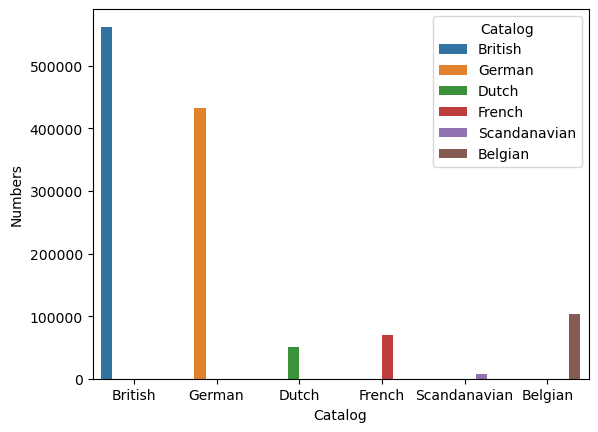

In [13]:
# Let get some numbers for the whole dataset first. We visualize with Seaborn.
def number_getter(subset, data):
    count = sales_datathon[sales_datathon['catalog_number'].str.contains(subset)].count().iloc[1]
    return count

sales_datathon_counts = pd.DataFrame({
    'Catalog': ['British', 'German', 'Dutch', 'French', 'Scandanavian', 'Belgian'],
    'Numbers': [number_getter('Br-', sales_datathon), number_getter('D-', sales_datathon), number_getter('N-', sales_datathon), 
                number_getter('F-', sales_datathon), number_getter('SC-', sales_datathon), number_getter('B-', sales_datathon) ]
}    
)

import seaborn as sns

sns.barplot(sales_datathon_counts, x="Catalog", y="Numbers", hue="Catalog")


In [14]:
# This function returns numbers on sales events based on two inputs: time period, and a dataset.
# time_period goes in as a list with two integers—min and max of range.
def catalog_counter(time_period, sales_datathon):
    # number_getter needs to be re-instantiated inside the function, or else it targets the sales_datathon variable outside of it
    def number_getter(subset, data):
        count = sales_datathon[sales_datathon['catalog_number'].str.contains(subset)].count().iloc[1]
        return count
    sales_datathon = sales_datathon[(sales_datathon['lot_sale_year'] > time_period[0]) & (sales_datathon['lot_sale_year'] < time_period[1])]
    sales_counts = pd.DataFrame({
        'Catalog': ['British', 'German', 'Dutch', 'French', 'Scandanavian', 'Belgian'],
        'Numbers': [number_getter('Br-', sales_datathon), number_getter('D-', sales_datathon), number_getter('N-', sales_datathon), 
                    number_getter('F-', sales_datathon), number_getter('SC-', sales_datathon), number_getter('B-', sales_datathon) ]
    }    
    )
    return sales_counts


In [8]:
# An example of the function
catalog_counter([1650,1700],sales_datathon)

,Catalog,Numbers
0,British,38231
1,German,368
2,Dutch,1131
3,French,245
4,Scandanavian,211
5,Belgian,73


In [9]:
# A while loop will return all counts by, say, 50-year period
semicent = 1650
while semicent < 1950:
    print('++++++++++'+str(semicent)+'-'+str(semicent+50)+'+++++++++++')
    print(catalog_counter([semicent,semicent+50],sales_datathon))
    #sns.barplot(catalog_counter([sesqui,sesqui+50],sales_datathon), x="Catalog", y="Numbers", hue="Catalog")
    semicent+=50


++++++++++1650-1700+++++++++++
        Catalog  Numbers
0       British    38231
1        German      368
2         Dutch     1131
3        French      245
4  Scandanavian      211
5       Belgian       73
++++++++++1700-1750+++++++++++
        Catalog  Numbers
0       British    33900
1        German     3107
2         Dutch     8526
3        French      583
4  Scandanavian      556
5       Belgian     3583
++++++++++1750-1800+++++++++++
        Catalog  Numbers
0       British   162331
1        German    44741
2         Dutch      188
3        French    66769
4  Scandanavian     6438
5       Belgian    34241
++++++++++1800-1850+++++++++++
        Catalog  Numbers
0       British   317549
1        German        0
2         Dutch    39998
3        French     1963
4  Scandanavian        0
5       Belgian    63142
++++++++++1850-1900+++++++++++
        Catalog  Numbers
0       British     1592
1        German        0
2         Dutch        0
3        French        0
4  Scandanavian     

### Sankey Chart

This is a classic visualization, originally invented to visualize the workings of internal combustion engines. The coolest version of it remains Charles Minard's 1869 visualization of Napoleon's march into and out of Russia. The major requirement of this kind of visualization is a "source" column and a "target" column.
![Minard](https://upload.wikimedia.org/wikipedia/commons/2/29/Minard.png "Minard Diagram")

In [ ]:
import holoviews as hv
import plotly.graph_objects as go

# Nan values create problems for almost any function that is looking for a string. We have to replace them.
# A bonus is we can gather all unknown buyers and sellers into one category.
data['Buy Auth Addr 1'].fillna('Unknown Buyer', inplace=True)
data['Sell Auth Loc 1'].fillna('Unknown Seller', inplace=True)

# We need to assign each buyer and seller a country.
# Another method would be to run the whole string through a geotagging API like Geopy.
# That becomes impossible when we are dealing with 40k+ rows.
# Instead, we regex from the "Buy Auth Addr 1" and "Sell Auth Loc 1" columns.
def actor_country(string):
    output = re.sub("(.*)(,\s)(.*$)","\\3", string)
    return output

data['buyer_country'] = data['Buy Auth Addr 1'].apply(lambda x: actor_country(x))
data['seller_country'] = data['Sell Auth Loc 1'].apply(lambda x: actor_country(x))

In [ ]:
# running on the whole dataset is computing-intensive. Let's cut it down.
data = data.head(50)

In [ ]:
# sankey diagrams run on three columns: source, target, value (usually a number)
# the two lines below grab the two relevant columns for source and target
# We use the "zip" method to stitch those back as a separate df
# then we assign is row a 'value' of 1
source = data['buyer_country']
target = data['seller_country']
edges = pd.DataFrame(zip(source, target), columns=['source', 'target'])
edges['value'] = 1

#--------------------------------------
# The sankey function requires that strings be assigned numeric equivalents
# These can be encoded in a dictionary.
#'label' parameter in plotly 
unique_source_target = list(pd.unique(edges[['source', 'target']].values.ravel('K')))
#for assigning unique number to each source and target
mapping_dict = {k: v for v, k in enumerate(unique_source_target)}
#mapping of full data
edges['source'] = edges['source'].map(mapping_dict)
edges['target'] = edges['target'].map(mapping_dict)
#converting full dataframe as list for using with in plotly
links_dict = edges.to_dict(orient='list')

#---------------------------------------
#Sankey Diagram Code 
fig = go.Figure(data=[go.Sankey(
    node = dict(
    pad = 15,
    thickness = 20,
    line = dict(color = "black", width = 0.5),
    label = unique_source_target,

    ),
    link = dict(
    source = links_dict["source"],
    target = links_dict["target"],
    value = links_dict["value"],

))])

sankey = fig.update_layout(title_text="Knoedler Sankey Diagram", font_size=10,width=1000, height=600)
sankey